In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
sales = pd.read_csv('Sales_Data.csv', parse_dates=['transaction timestamp'])

In [3]:
sales.rename(index=str, columns={'transaction id': 'transID',
                              'product id' : 'prdtID',
                              'product description' : 'description',
                              'quantity sold' : 'quantity',
                              'transaction timestamp' : 'timestamp',
                              'day_name' : 'day',
                              'day_of_month' : 'day_num',
                              'month_of_year' : 'month',
                              'time_of_day(hh:mm:ss)' : 'time',
                              'unit price' : 'price',
                              'customer id' : 'custID',
                              'transaction country' : 'country'}, inplace=True)

In [4]:
sales.head()

,transID,prdtID,description,quantity,timestamp,price,custID,country,date,day,day_num,month,time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,Wednesday,1,December,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,Wednesday,1,December,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,Wednesday,1,December,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,Wednesday,1,December,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,Wednesday,1,December,08:26:00


In [5]:
columns = ['transID', 'custID', 'prdtID', 'description', 'quantity', 'price', 'country', 'timestamp', 'date', 'day', 'day_num', 'month', 'time']

In [6]:
# convert to lower case
sales['description'] = sales['description'].str.lower()
# remove trailing white spaces
sales['description'] = sales['description'].str.strip()

In [7]:
sales = sales.drop_duplicates()

In [8]:
sales = sales[sales['price']>0]
sales = sales[sales['quantity']>0]

In [9]:
# RFM (Recency, Frequency, Monetary) Analysis

# Customer Segmentation: Dividing customers into groups or clusters on 
# the basis of commin characteristics

# Demographic characteristics: occupation, gender, age, location, 
# and marital status
# Geographic characteristics: location, regional amd urban/rural
# Psychographic characteristics: social class, lifestyle, and
# personality characterostics
# Behavioral characteristics: spending, consumption habits,
# product/service usage, and previously purchased products

# RFM Analysis is a behavior-based approach grouping customers into segments

In [10]:
rfmdf = pd.DataFrame()

In [11]:
rfmdf['custID'] = sales['custID']

In [12]:
sales['total_price'] = sales['quantity'] * sales['price'] 

In [13]:
rfmdf['total_price'] = sales['total_price']

In [14]:
rfmdf['date'] = sales['timestamp']

In [15]:
rfmdf.head()

,custID,total_price,date
0,17850.0,15.30,2010-12-01 08:26:00
1,17850.0,20.34,2010-12-01 08:26:00
2,17850.0,22.00,2010-12-01 08:26:00
3,17850.0,20.34,2010-12-01 08:26:00
4,17850.0,20.34,2010-12-01 08:26:00


In [16]:
rfmdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524878 entries, 0 to 541908
Data columns (total 3 columns):
custID         392692 non-null float64
total_price    524878 non-null float64
date           524878 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2)
memory usage: 16.0+ MB


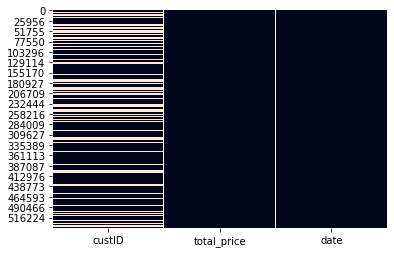

In [17]:
sns.heatmap(rfmdf.isnull(), cbar=False)

In [18]:
rfmdf.dropna(inplace=True)

In [19]:
rfmdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 3 columns):
custID         392692 non-null float64
total_price    392692 non-null float64
date           392692 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2)
memory usage: 12.0+ MB


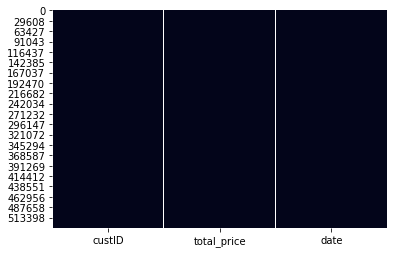

In [20]:
sns.heatmap(rfmdf.isnull(), cbar=False)

In [21]:
start = rfmdf['date'].min()

In [22]:
stop = rfmdf['date'].max()

In [23]:
print('From',start,'to',stop,'that is',stop-start)

From 2010-12-01 08:26:00 to 2011-12-09 12:50:00 that is 373 days 04:24:00


In [24]:
check = datetime.datetime(2011,12,10)
rfmdf['duration'] = check - rfmdf['date']
rfmdf['duration'].astype('timedelta64[D]')
rfmdf['duration'] = rfmdf['duration'] / np.timedelta64(1,'D')
rfmdf.head()

,custID,total_price,date,duration
0,17850.0,15.30,2010-12-01 08:26:00,373.648611
1,17850.0,20.34,2010-12-01 08:26:00,373.648611
2,17850.0,22.00,2010-12-01 08:26:00,373.648611
3,17850.0,20.34,2010-12-01 08:26:00,373.648611
4,17850.0,20.34,2010-12-01 08:26:00,373.648611


In [25]:
rfmdf['duration'].max()

373.6486111111111

In [26]:
df = rfmdf[rfmdf['duration'] < 200]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 254246 entries, 201903 to 541908
Data columns (total 4 columns):
custID         254246 non-null float64
total_price    254246 non-null float64
date           254246 non-null datetime64[ns]
duration       254246 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 9.7+ MB


In [28]:
rfm = df.groupby('custID').agg({'duration':lambda x:x.min(), # recency
                               'custID':lambda x:len(x), # frequency
                               'total_price': lambda x:x.sum()}) # money spent

In [29]:
rfm.rename(columns={
    'duration' : 'recency',
    'custID' : 'freq',
    'total_price' : 'money'
}, inplace=True)

In [30]:
rfm.head()

,recency,freq,money
custID,,,
12347.0,2.338889,98.0,2486.57
12348.0,75.449306,3.0,310.00
12349.0,18.589583,73.0,1757.55
12352.0,36.390972,47.0,944.23
12356.0,22.638889,2.0,58.35


In [31]:
df[df['custID']==12348.0]

,custID,total_price,date,duration
359058,12348.0,150.0,2011-09-25 13:13:00,75.449306
359059,12348.0,120.0,2011-09-25 13:13:00,75.449306
359060,12348.0,40.0,2011-09-25 13:13:00,75.449306


In [32]:
quartiles = rfm.quantile(q=[0.25, 0.50, 0.75])
print(quartiles, type(quartiles))

        recency  freq     money
0.25  14.558333  16.0   289.405
0.50  35.400000  36.0   581.200
0.75  75.433681  77.0  1308.960 <class 'pandas.core.frame.DataFrame'>


In [33]:
quartiles = quartiles.to_dict()
quartiles

{'recency': {0.25: 14.558333333333334, 0.5: 35.4, 0.75: 75.43368055555555},
 'freq': {0.25: 16.0, 0.5: 36.0, 0.75: 77.0},
 'money': {0.25: 289.405, 0.5: 581.2, 0.75: 1308.96}}

In [34]:
def recency(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

In [35]:
def freq_mon(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1  

In [36]:
rfmseg = rfm
rfmseg['R-quartile'] = rfmseg['recency'].apply(recency, args=('recency', quartiles,))
rfmseg['F-quartile'] = rfmseg['freq'].apply(freq_mon, args=('freq', quartiles),)
rfmseg['M-quartile'] = rfmseg['money'].apply(freq_mon, args=('money', quartiles),)

In [37]:
rfmseg.head()

,recency,freq,money,R-quartile,F-quartile,M-quartile
custID,,,,,,
12347.0,2.338889,98.0,2486.57,1,1,1
12348.0,75.449306,3.0,310.00,4,4,3
12349.0,18.589583,73.0,1757.55,2,2,1
12352.0,36.390972,47.0,944.23,3,2,2
12356.0,22.638889,2.0,58.35,2,4,4


In [38]:
rfmseg['RFM'] = rfmseg['R-quartile']*100 + rfmseg['F-quartile']*10 + rfmseg['M-quartile']

In [39]:
rfmseg.head()

,recency,freq,money,R-quartile,F-quartile,M-quartile,RFM
custID,,,,,,,
12347.0,2.338889,98.0,2486.57,1,1,1,111
12348.0,75.449306,3.0,310.00,4,4,3,443
12349.0,18.589583,73.0,1757.55,2,2,1,221
12352.0,36.390972,47.0,944.23,3,2,2,322
12356.0,22.638889,2.0,58.35,2,4,4,244


In [44]:
rfmseg[rfmseg['RFM']==111].sort_values('money', ascending=False).head()

,recency,freq,money,R-quartile,F-quartile,M-quartile,RFM
custID,,,,,,,
18102.0,0.506944,353.0,195015.19,1,1,1,111
14646.0,1.491667,1330.0,179865.78,1,1,1,111
17450.0,8.438194,232.0,156656.21,1,1,1,111
14911.0,1.337500,4117.0,105410.47,1,1,1,111
14156.0,9.545833,880.0,73317.85,1,1,1,111


In [54]:
rfmseg['score'] = rfmseg['R-quartile'] + rfmseg['F-quartile'] + rfmseg['M-quartile']

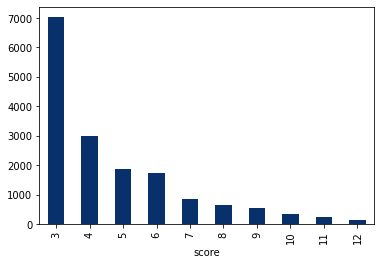

In [55]:
rfmseg.groupby('score').agg('money').mean().head(10).plot(kind='bar', colormap='Blues_r')

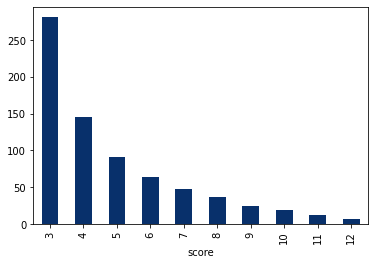

In [56]:
rfmseg.groupby('score').agg('freq').mean().head(10).plot(kind='bar', colormap='Blues_r')

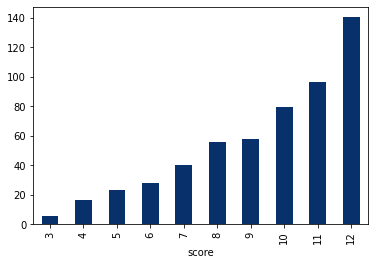

In [57]:
rfmseg.groupby('score').agg('recency').mean().head(10).plot(kind='bar', colormap='Blues_r')

In [59]:
rfmseg[rfmseg['score']==min(rfmseg['score'])].sort_values('money', ascending=False).head()

,recency,freq,money,R-quartile,F-quartile,M-quartile,RFM,score
custID,,,,,,,,
18102.0,0.506944,353.0,195015.19,1,1,1,111,3
14646.0,1.491667,1330.0,179865.78,1,1,1,111,3
17450.0,8.438194,232.0,156656.21,1,1,1,111,3
14911.0,1.337500,4117.0,105410.47,1,1,1,111,3
14156.0,9.545833,880.0,73317.85,1,1,1,111,3
